In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV # For probability score output
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
dados = pd.read_csv("/Users/geraldocangondo/Desktop/Data_Analise/Data_Science_Alura/ML_Classificacao/Classificacao_01/churn.csv")

In [3]:
dados.head()

,id_cliente,score_credito,pais,sexo_biologico,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
0,15634602,619,França,Mulher,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Espanha,Mulher,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,França,Mulher,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,França,Mulher,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Espanha,Mulher,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Número de Linhas e Colunas do Dataset

linhas, colunas = dados.shape
print(f'Total de Linhas:{linhas}')
print(f'Total de Colunas:{colunas}')

Total de Linhas:10000
Total de Colunas:12


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_cliente           10000 non-null  int64  
 1   score_credito        10000 non-null  int64  
 2   pais                 10000 non-null  object 
 3   sexo_biologico       10000 non-null  object 
 4   idade                10000 non-null  int64  
 5   anos_de_cliente      10000 non-null  int64  
 6   saldo                10000 non-null  float64
 7   servicos_adquiridos  10000 non-null  int64  
 8   tem_cartao_credito   10000 non-null  int64  
 9   membro_ativo         10000 non-null  int64  
 10  salario_estimado     10000 non-null  float64
 11  churn                10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
for i in dados.columns:
    print(i)

id_cliente
score_credito
pais
sexo_biologico
idade
anos_de_cliente
saldo
servicos_adquiridos
tem_cartao_credito
membro_ativo
salario_estimado
churn


In [7]:
dados.describe()

,id_cliente,score_credito,idade,anos_de_cliente,saldo,servicos_adquiridos,tem_cartao_credito,membro_ativo,salario_estimado,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


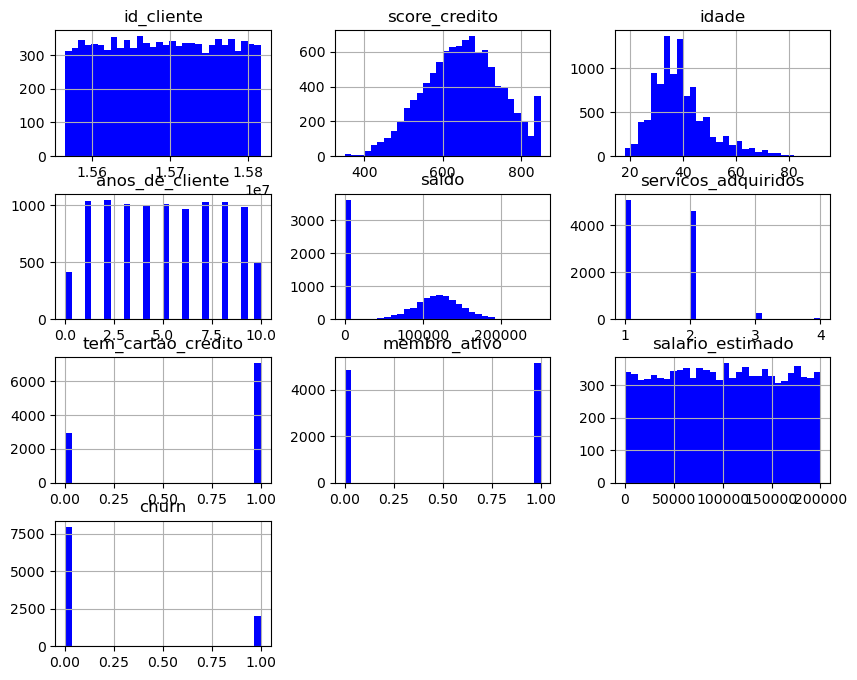

In [8]:
dados.hist(bins=30, figsize=(10, 8), color = 'b');

In [9]:
#Exporando a variavel dependente
dados['churn'].value_counts()

churn
0    7963
1    2037
Name: count, dtype: int64

In [10]:
dados['churn'].value_counts(normalize=True) * 100

churn
0    79.63
1    20.37
Name: proportion, dtype: float64

2 ) - Visualização Gráfica das variavéis Categóricas

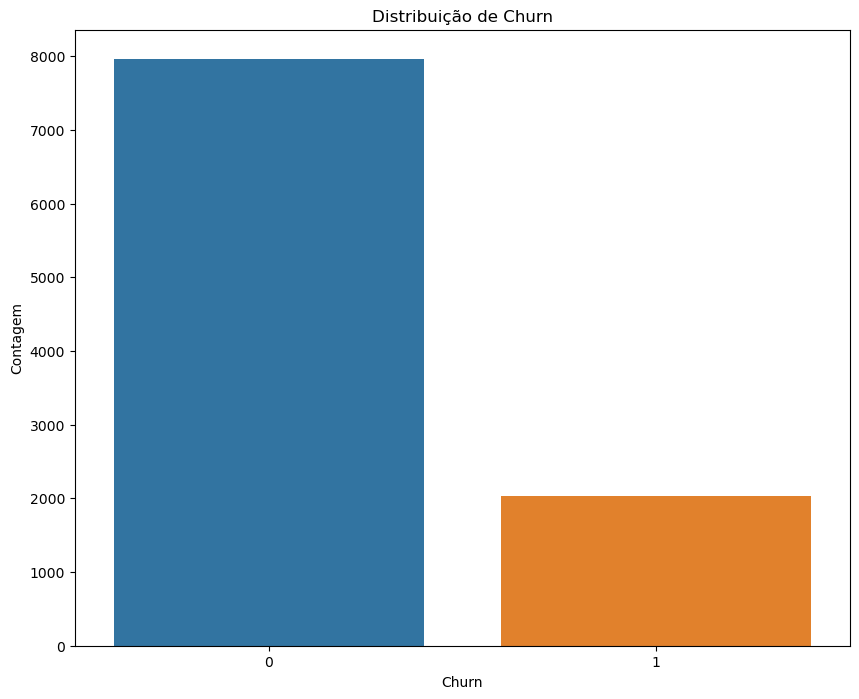

In [11]:
plt.figure(figsize=(10, 8))
ax = sns.countplot(data=dados, x='churn')
plt.title('Distribuição de Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.show()

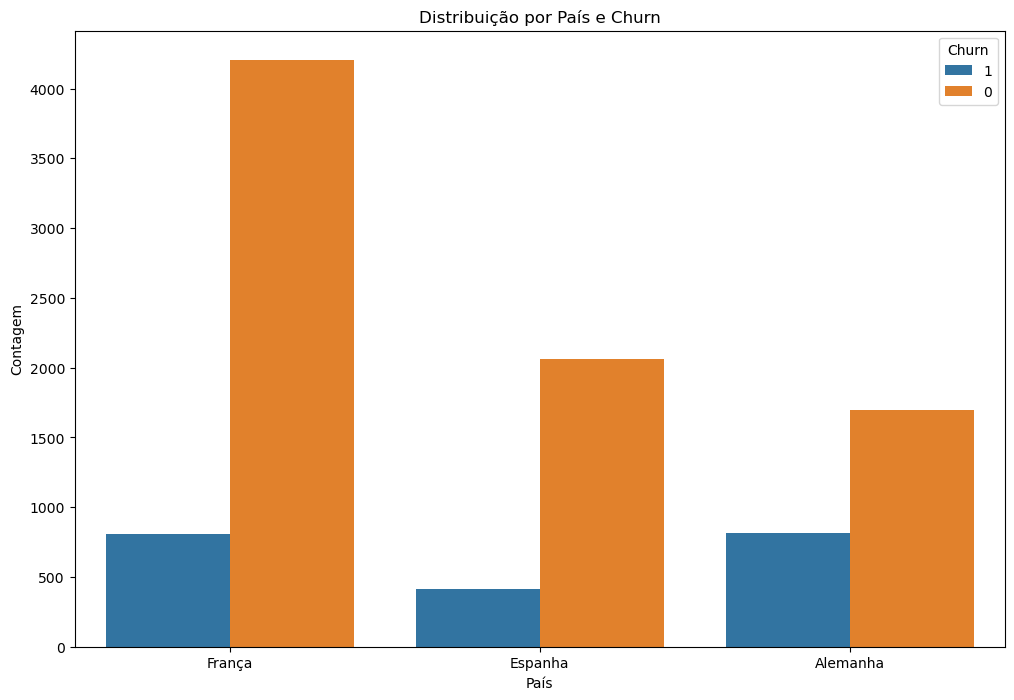

In [12]:
data1 = dados['churn'].astype(str)

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dados, x='pais', hue=data1)
plt.title('Distribuição por País e Churn', fontsize=12)
plt.xlabel('País', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.legend(title='Churn', fontsize=10)
plt.show()

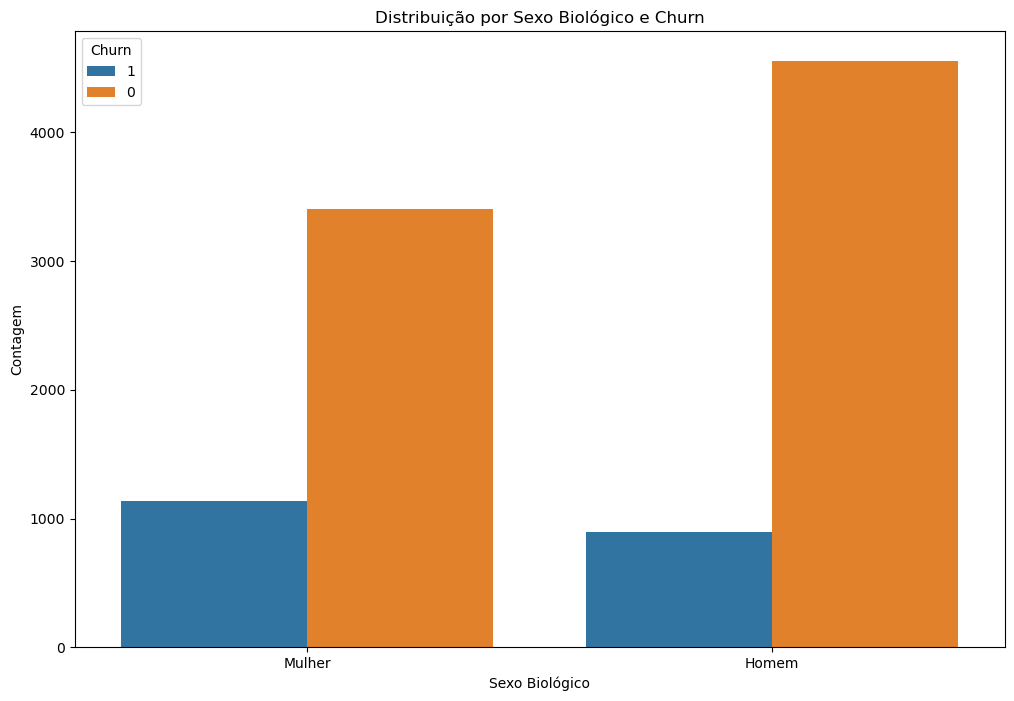

In [13]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dados, x='sexo_biologico', hue=data1)
plt.title('Distribuição por Sexo Biológico e Churn', fontsize=12)
plt.xlabel('Sexo Biológico', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.legend(title='Churn', fontsize=10)
plt.show()

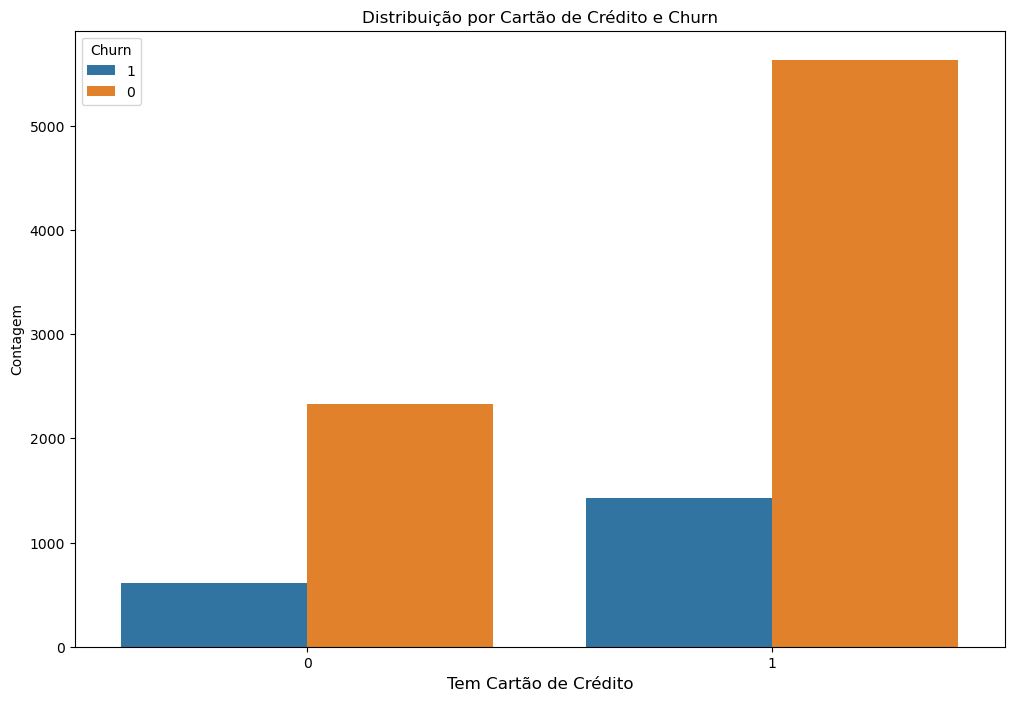

In [14]:

plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dados, x='tem_cartao_credito', hue=data1)
plt.title('Distribuição por Cartão de Crédito e Churn', fontsize=12)
plt.xlabel('Tem Cartão de Crédito', fontsize=12)
plt.ylabel('Contagem', fontsize=10)
plt.legend(title='Churn', fontsize=10)
plt.show()

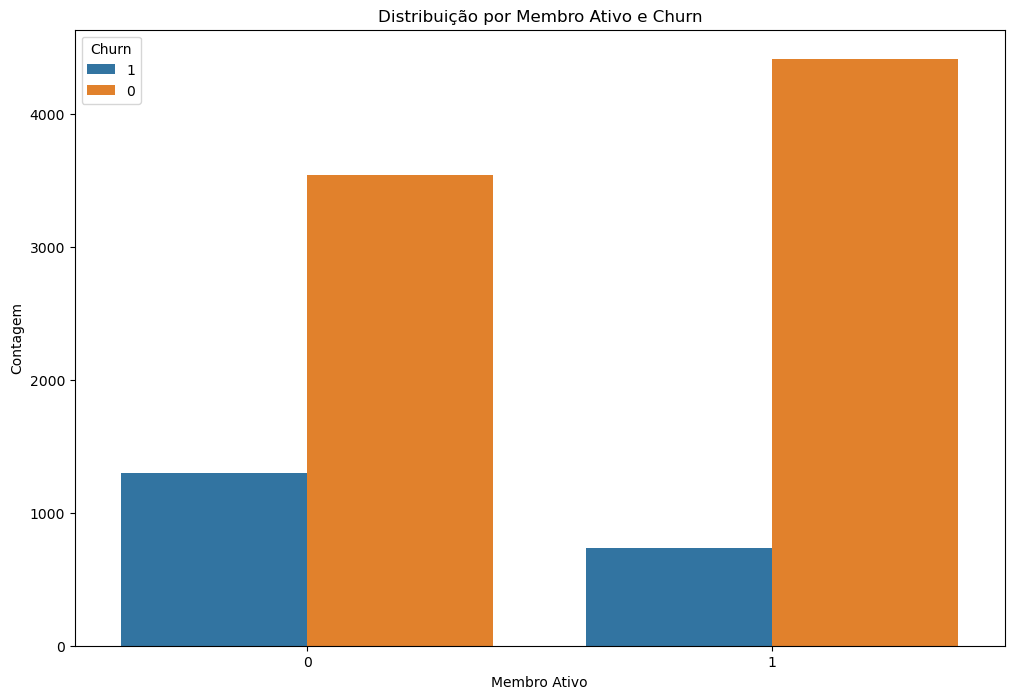

In [15]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(data=dados, x='membro_ativo', hue=data1)
plt.title('Distribuição por Membro Ativo e Churn', fontsize=12)
plt.xlabel('Membro Ativo', fontsize=10)
plt.ylabel('Contagem', fontsize=10)
plt.legend(title='Churn', fontsize=10)
plt.show()

3 ) - Visualização Gráfica do Dataset das variaveis Numéricas

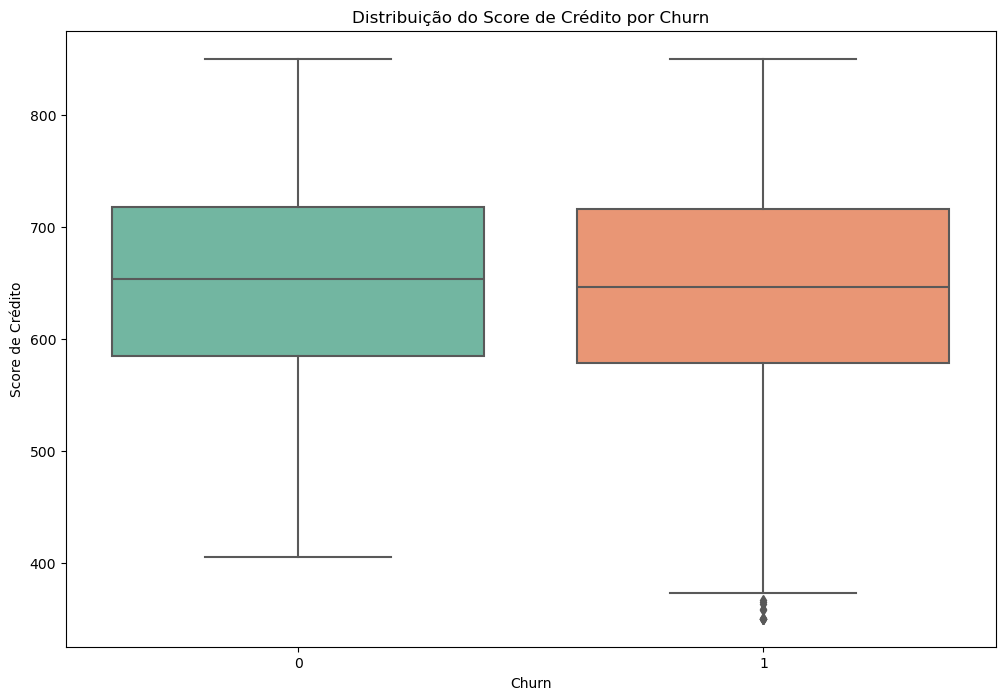

In [16]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='score_credito', palette='Set2')
plt.title('Distribuição do Score de Crédito por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Score de Crédito', fontsize=10)
plt.show()

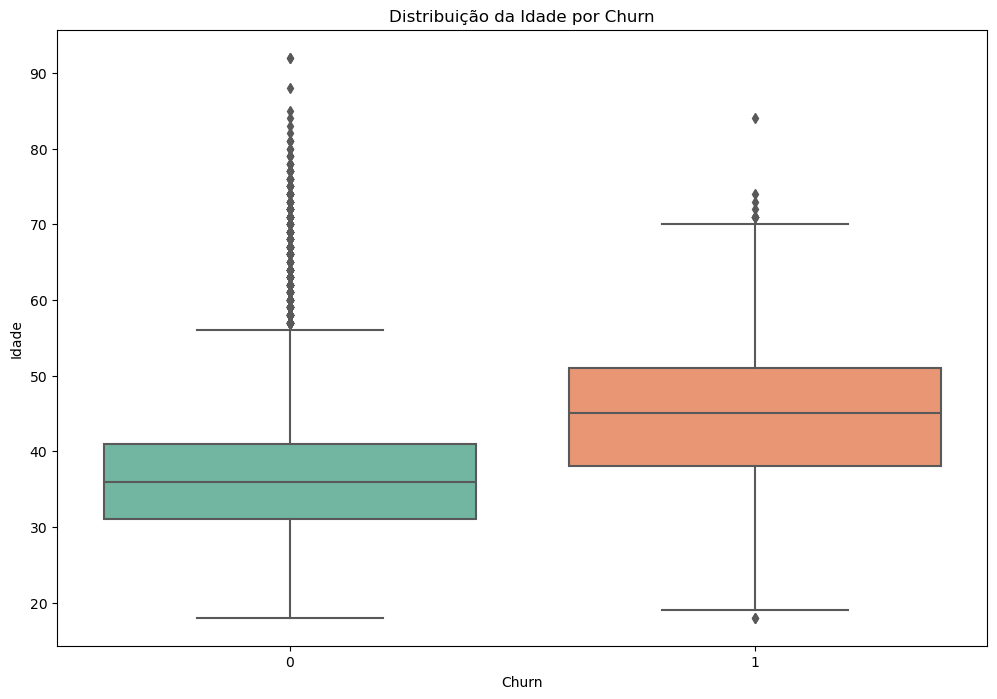

In [17]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='idade', palette='Set2')
plt.title('Distribuição da Idade por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Idade', fontsize=10)
plt.show()

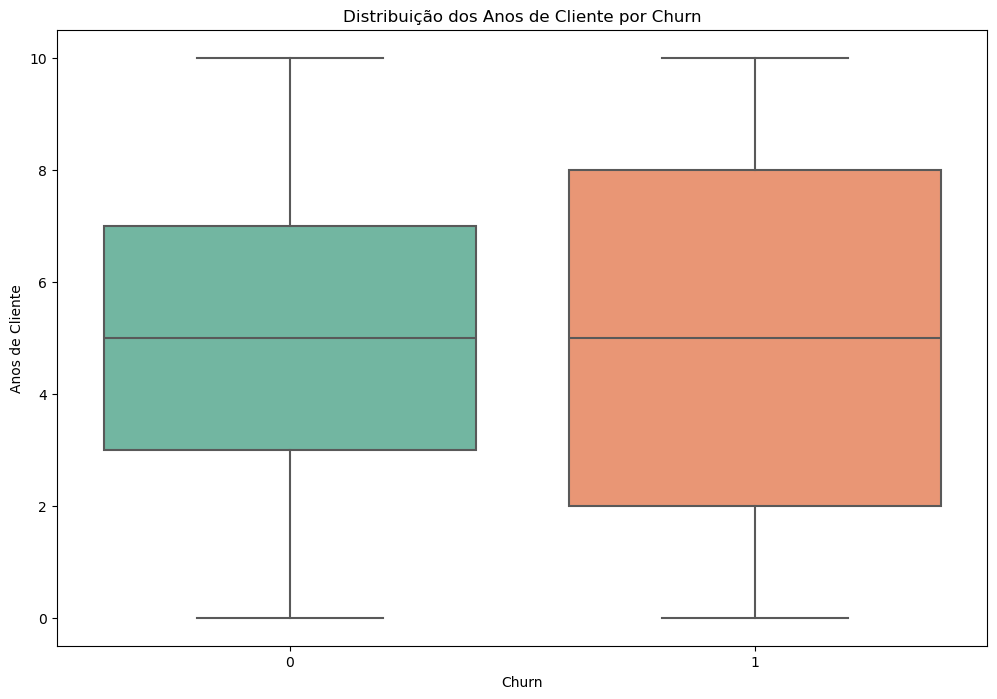

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='anos_de_cliente', palette='Set2')
plt.title('Distribuição dos Anos de Cliente por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Anos de Cliente', fontsize=10)
plt.show()

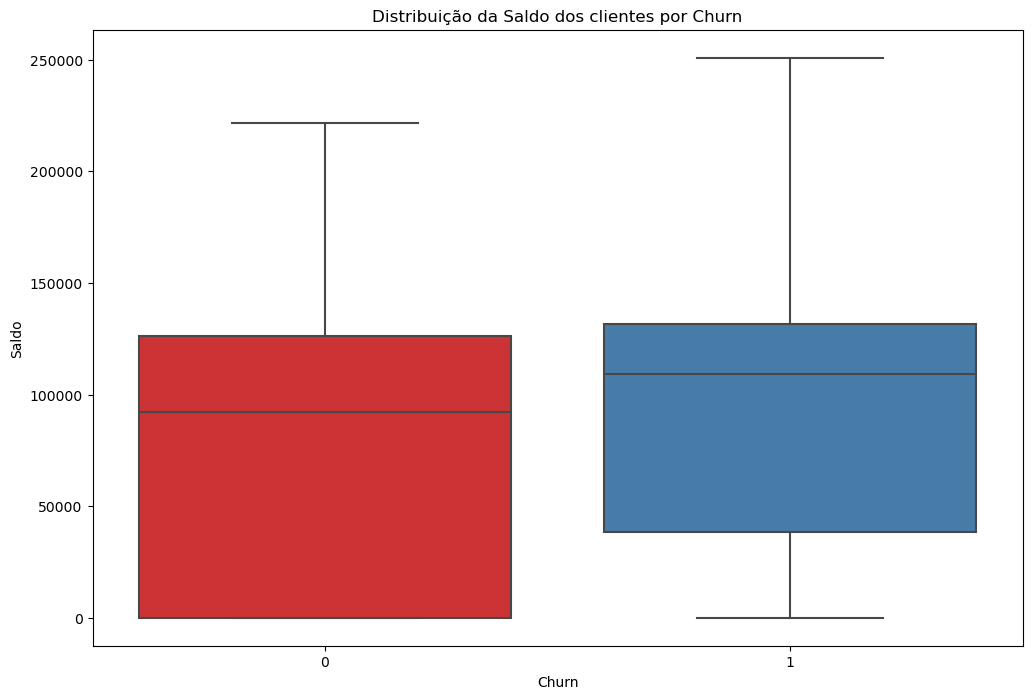

In [19]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='saldo', palette='Set1')
plt.title('Distribuição da Saldo dos clientes por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Saldo', fontsize=10)
plt.show()

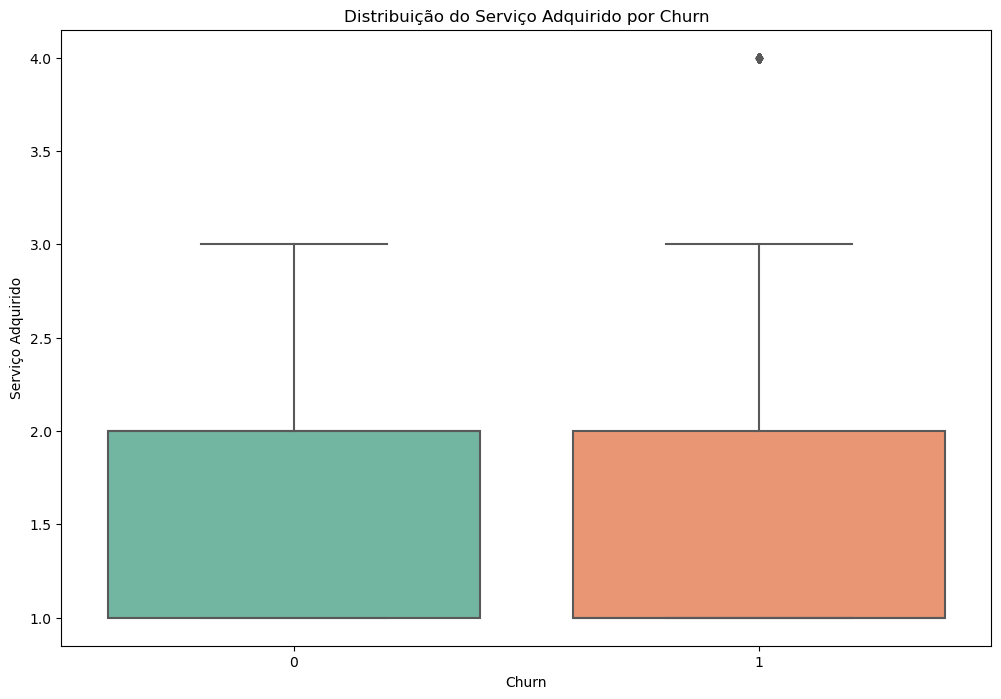

In [20]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='servicos_adquiridos', palette='Set2')
plt.title('Distribuição do Serviço Adquirido por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Serviço Adquirido', fontsize=10)
plt.show()

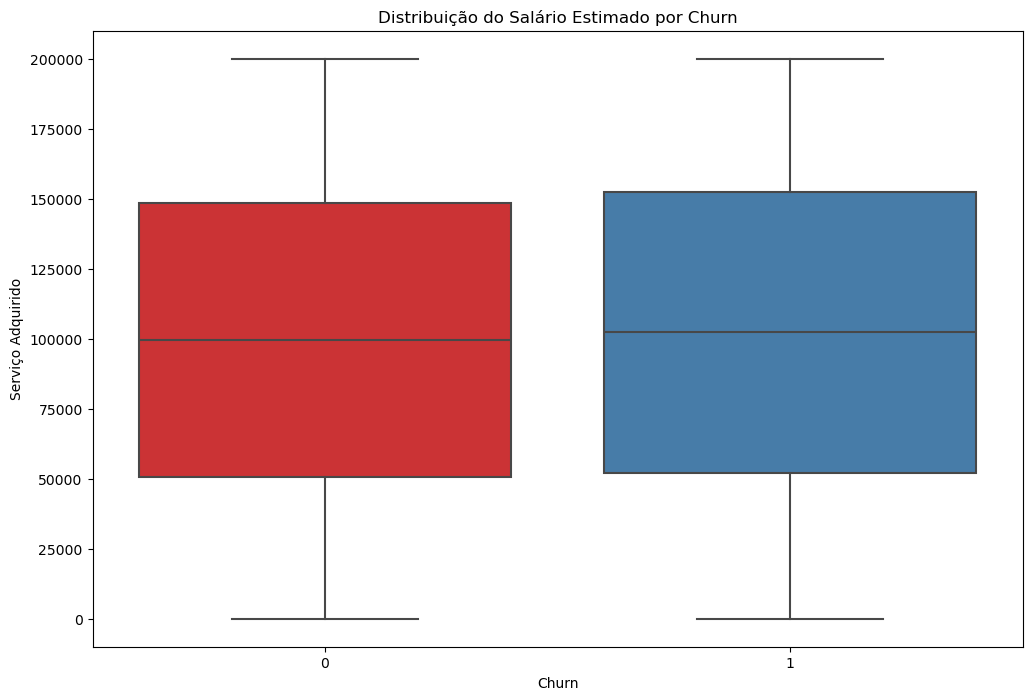

In [21]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dados, x='churn', y='salario_estimado', palette='Set1')
plt.title('Distribuição do Salário Estimado por Churn', fontsize=12)
plt.xlabel('Churn', fontsize=10)
plt.ylabel('Serviço Adquirido', fontsize=10)
plt.show()

4 ) - Divisão dos dados Variavel Explicativas(x) e Variavel Alvo(y)

In [22]:
x = dados.drop('churn', axis = 1)

In [23]:
x.shape

(10000, 11)

In [24]:
y = dados['churn']

In [25]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: churn, Length: 10000, dtype: int64

5 ) - Transformação das Varaiveia Catéricas em para o formato numero com OneHotEncoder

In [26]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'), 
    ['sexo_biologico','pais', 'tem_cartao_credito', 'membro_ativo']),

    remainder = 'passthrough',
    sparse_threshold = 0)

In [27]:
colunas = x.columns

In [28]:
x = one_hot.fit_transform(x)

In [29]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__sexo_biologico_Mulher',
       'onehotencoder__pais_Alemanha', 'onehotencoder__pais_Espanha',
       'onehotencoder__pais_França',
       'onehotencoder__tem_cartao_credito_1',
       'onehotencoder__membro_ativo_1', 'remainder__id_cliente',
       'remainder__score_credito', 'remainder__idade',
       'remainder__anos_de_cliente', 'remainder__saldo',
       'remainder__servicos_adquiridos', 'remainder__salario_estimado'],
      dtype=object)

In [30]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__sexo_biologico_Mulher,onehotencoder__pais_Alemanha,onehotencoder__pais_Espanha,onehotencoder__pais_França,onehotencoder__tem_cartao_credito_1,onehotencoder__membro_ativo_1,remainder__id_cliente,remainder__score_credito,remainder__idade,remainder__anos_de_cliente,remainder__saldo,remainder__servicos_adquiridos,remainder__salario_estimado
0,1.0,0.0,0.0,1.0,1.0,1.0,15634602.0,619.0,42.0,2.0,0.00,1.0,101348.88
1,1.0,0.0,1.0,0.0,0.0,1.0,15647311.0,608.0,41.0,1.0,83807.86,1.0,112542.58
2,1.0,0.0,0.0,1.0,1.0,0.0,15619304.0,502.0,42.0,8.0,159660.80,3.0,113931.57
3,1.0,0.0,0.0,1.0,0.0,0.0,15701354.0,699.0,39.0,1.0,0.00,2.0,93826.63
4,1.0,0.0,1.0,0.0,1.0,1.0,15737888.0,850.0,43.0,2.0,125510.82,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,1.0,1.0,0.0,15606229.0,771.0,39.0,5.0,0.00,2.0,96270.64
9996,0.0,0.0,0.0,1.0,1.0,1.0,15569892.0,516.0,35.0,10.0,57369.61,1.0,101699.77
9997,1.0,0.0,0.0,1.0,0.0,1.0,15584532.0,709.0,36.0,7.0,0.00,1.0,42085.58
9998,0.0,1.0,0.0,0.0,1.0,0.0,15682355.0,772.0,42.0,3.0,75075.31,2.0,92888.52


6 ) - Transformação da Variavel Alvo (y) Utilizando LabelEncoder

In [31]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [32]:
y

array([1, 0, 1, ..., 1, 1, 0])

7 ) - Separação dos dados para Treinamento e Testes de forma Estratificada

In [33]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify = y, random_state = 5)

8 ) - Testando com o modelo de base DUMMYCLASSIFIER para encontrar uma taxa de acerto com metodo score

In [34]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)
dummy.score(x_teste, y_teste)

0.7964

9 ) - Testando com o modelo ARVORE DE DECISÃO com max_depth = 4

In [35]:
modelo_arvdec = DecisionTreeClassifier(max_depth = 4, random_state = 5)
modelo_arvdec.fit(x_treino, y_treino)
modelo_arvdec.score(x_teste, y_teste)

0.8464

In [36]:
y_previsao = modelo_arvdec.predict(x_teste)

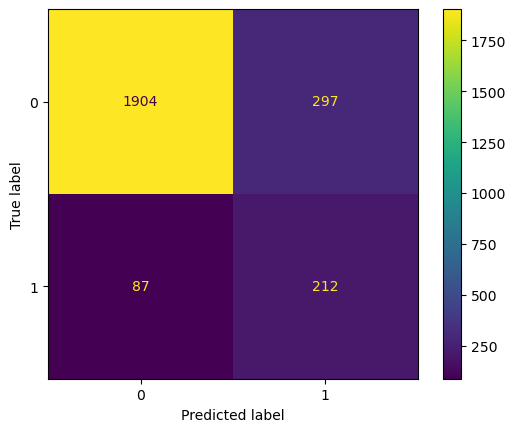

In [37]:
matriz_arvdec = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix = matriz_arvdec)
visual.plot();

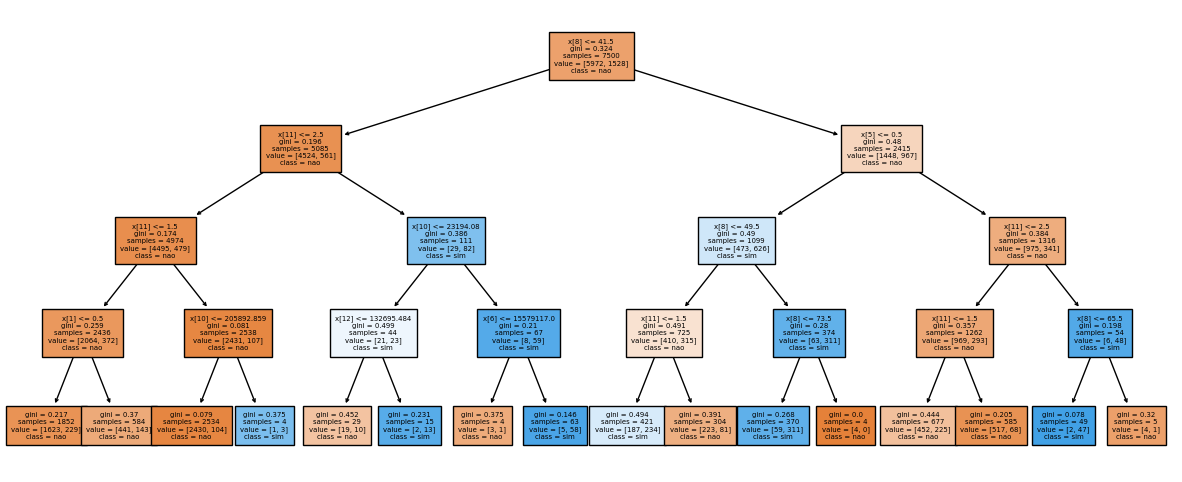

In [38]:
plt.figure(figsize = (15, 6))
plot_tree(modelo_arvdec, filled = True, class_names = ['nao', 'sim'], fontsize = 5);

In [39]:
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1991
           1       0.71      0.42      0.52       509

    accuracy                           0.85      2500
   macro avg       0.79      0.69      0.72      2500
weighted avg       0.83      0.85      0.83      2500



10 ) - Normalização dos dados

In [40]:
#A normalização de dados é uma tarefa importante para manter todos os valores numéricos em uma mesma 
# escala e garantir que todas as características tenham o mesmo impacto no modelo.

normalizacao = MinMaxScaler()
x_treino_normal = normalizacao.fit_transform(x_treino)

In [41]:
pd.DataFrame(x_treino_normal)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.0,0.0,1.0,1.0,0.0,0.134945,0.796,0.216216,0.8,0.000000,0.333333,0.267600
1,0.0,0.0,0.0,1.0,0.0,1.0,0.388805,0.612,0.256757,0.2,0.000000,0.333333,0.338919
2,1.0,1.0,0.0,0.0,1.0,0.0,0.372064,0.634,0.256757,0.5,0.386645,0.666667,0.890516
3,1.0,0.0,0.0,1.0,1.0,0.0,0.540667,0.514,0.040541,0.0,0.000000,0.333333,0.580365
4,1.0,0.0,1.0,0.0,0.0,1.0,0.980751,0.374,0.270270,0.6,0.594774,0.000000,0.738898
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0.0,1.0,0.0,0.0,1.0,0.0,0.440380,0.590,0.391892,0.9,0.637940,0.000000,0.609048
7496,1.0,0.0,1.0,0.0,1.0,0.0,0.670263,0.676,0.229730,0.6,0.000000,0.000000,0.127054
7497,1.0,0.0,1.0,0.0,1.0,0.0,0.480427,0.646,0.229730,0.6,0.000000,0.333333,0.492884
7498,1.0,0.0,0.0,1.0,1.0,0.0,0.261445,0.720,0.202703,0.2,0.000000,0.333333,0.364454


11 ) - Aplicação do Modelo KNN

In [42]:
modelo_knn = KNeighborsClassifier()
modelo_knn.fit(x_treino_normal, y_treino)

KNeighborsClassifier()

In [43]:
x_teste_normal = normalizacao.transform(x_teste)

In [44]:
modelo_knn.score(x_teste_normal, y_teste)

0.8016

In [45]:
y_previsao = modelo_knn.predict(x_teste_normal)

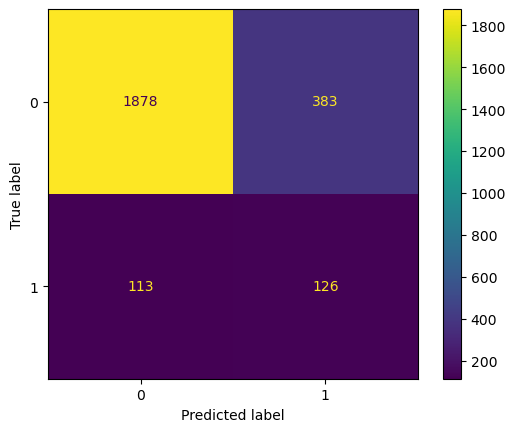

In [46]:
#Verificar o desempenho do modelo no conjunto de dados de teste
matriz_knn = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix=matriz_knn)
visual.plot();

In [47]:
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      1991
           1       0.53      0.25      0.34       509

    accuracy                           0.80      2500
   macro avg       0.68      0.60      0.61      2500
weighted avg       0.77      0.80      0.77      2500



12 ) - Aplicação do Modelo RANDON FOREST

In [48]:
modelo_RF = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
modelo_RF.fit(x_treino_normal, y_treino)

RandomForestClassifier(criterion='entropy', random_state=0)

In [49]:
x_teste_normal = normalizacao.transform(x_teste)

In [50]:
y_previsao = modelo_RF.predict(x_teste_normal)

In [51]:
modelo_RF.score(x_teste_normal, y_teste)

0.8632

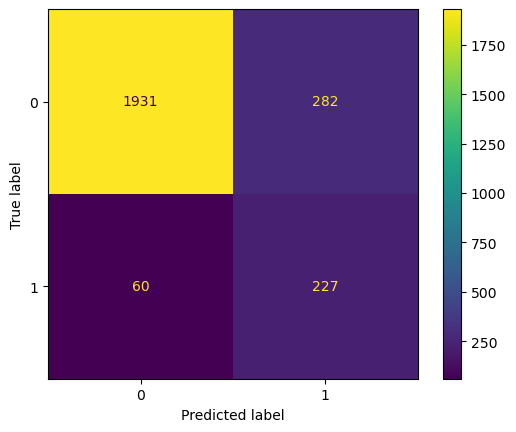

In [52]:
matriz_RF = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix = matriz_RF)
visual.plot();

In [53]:
print(classification_report(y_teste, y_previsao))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.79      0.45      0.57       509

    accuracy                           0.86      2500
   macro avg       0.83      0.71      0.74      2500
weighted avg       0.86      0.86      0.85      2500



13 ) - Aplicação do Modelo Support Vector Machine (SVM)

In [54]:
modelo_svm = LinearSVC(max_iter = 1000)
modelo_svm = CalibratedClassifierCV(modelo_svm)
modelo_svm.fit(x_treino_normal, y_treino)

CalibratedClassifierCV(estimator=LinearSVC())

In [62]:
x_teste_normal = normalizacao.transform(x_teste)

In [63]:
y_previsao = modelo_svm.predict(x_teste_normal)

In [65]:
modelo_svm.score(x_teste_normal, y_teste)

0.806

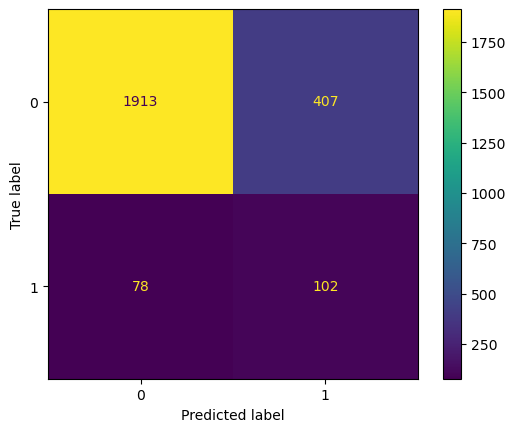

In [66]:
matriz_svm = confusion_matrix(y_previsao, y_teste)
visual = ConfusionMatrixDisplay(confusion_matrix = matriz_svm)
visual.plot();

14 ) - CURVA ROC - Comparação dos modelos

In [71]:
#curva ROC
fpr0, tpr0, thresh0 = roc_curve(y_teste, modelo_arvdec.predict_proba(x_teste)[:,1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_teste, modelo_knn.predict_proba(x_teste)[:,1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_teste, modelo_RF.predict_proba(x_teste)[:,1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_teste, modelo_svm.predict_proba(x_teste)[:,1], pos_label = 1)

In [72]:
#AUC score
auc_score0 = roc_auc_score(y_teste, modelo_arvdec.predict_proba(x_teste)[:, 1])
auc_score1 = roc_auc_score(y_teste, modelo_knn.predict_proba(x_teste)[:, 1])
auc_score2 = roc_auc_score(y_teste, modelo_RF.predict_proba(x_teste)[:, 1])
auc_score3 = roc_auc_score(y_teste, modelo_svm.predict_proba(x_teste)[:, 1])

In [73]:
#Acurácia:
print("Árvore de Decisão: ", auc_score0) 
print("K-Nearest Neighbors:: ", auc_score1) 
print("Random Forest: ", auc_score2)
print("Support Vector Machine: ", auc_score3) 

Árvore de Decisão:  0.8182750668775699
K-Nearest Neighbors::  0.4994666569306476
Random Forest:  0.6782998937260897
Support Vector Machine:  0.5


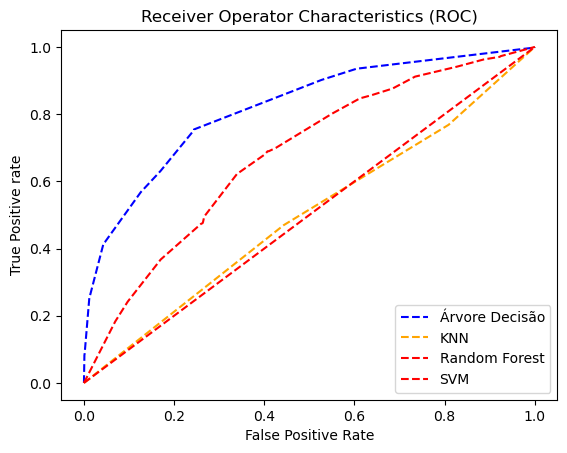

In [74]:
plt.plot(fpr0, tpr0, linestyle = "--", color = "blue", label = "Árvore Decisão")
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "KNN")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "Random Forest")
plt.plot(fpr3, tpr3, linestyle = "--", color = "red", label = "SVM")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()